In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/twitch_streamers.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    float64
 8   AVG_VIEWERS_PER_STREAM          999 non-null    float64
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    float64
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

In [6]:
df.describe()

,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000
mean,500.972973,5.996697,266.788599,70.257758,1.477878,56.961769,9.194033e+05,3.001478e+07,141.707708,3.591391
std,288.576373,3.241013,274.912323,163.873300,0.575189,322.866528,1.725451e+06,6.280328e+07,245.930466,1.797796
min,1.000000,1.200000,-424.000000,0.000000,1.000000,1.004000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,251.500000,4.200000,5.546500,3.381000,1.100000,3.702000,1.875000e+05,6.455000e+05,16.000000,2.200000
50%,501.000000,5.400000,185.000000,12.454000,1.300000,7.140000,4.370000e+05,6.950000e+06,55.000000,3.800000
75%,750.500000,6.900000,444.000000,37.596000,1.700000,13.588500,8.895000e+05,3.015000e+07,168.000000,5.100000
max,1000.000000,23.900000,991.000000,991.000000,9.300000,9092.000000,1.900000e+07,5.720000e+08,2980.000000,7.000000


In [7]:
df['2ND_MOST_STREAMED_GAME'].fillna("None", inplace=True)

In [8]:
top_games = df[df['MOST_STREAMED_GAME'] != "None"]['MOST_STREAMED_GAME'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Streamed Games')

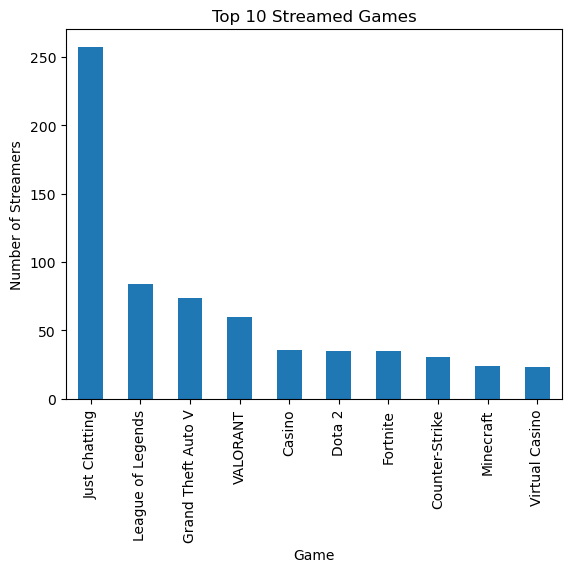

In [9]:
# Plot the top 10 streamed games
top_games.plot(kind='bar')
plt.xlabel('Game')
plt.ylabel('Number of Streamers')
plt.title('Top 10 Streamed Games')

Text(0.5, 1.0, 'Distribution of Followers')

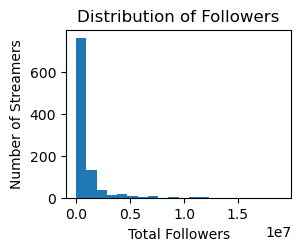

In [10]:
# Filter data with non-zero followers (to avoid division by zero)
data_filtered = df[df['TOTAL_FOLLOWERS'] > 0]

# Distribution of Followers
plt.subplot(2, 2, 1)
plt.hist(data_filtered['TOTAL_FOLLOWERS'], bins=20) 
plt.xlabel('Total Followers')
plt.ylabel('Number of Streamers')
plt.title('Distribution of Followers')


Text(0.5, 1.0, 'Distribution of Streamers by Follower Count')

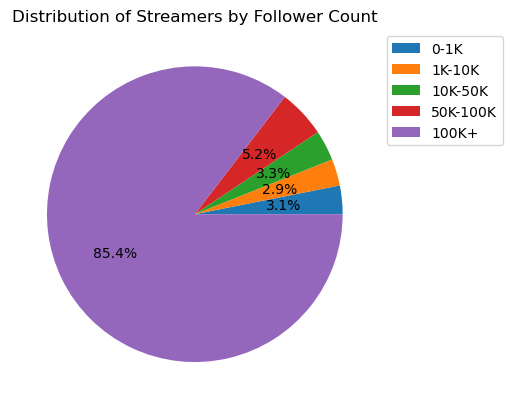

In [11]:
# Define follower ranges
follower_bins = [0, 1000, 10000, 50000, 100000, float('inf')]
follower_labels = ['0-1K', '1K-10K', '10K-50K', '50K-100K', '100K+']

# Create categories based on follower ranges
df['follower_category'] = pd.cut(df['TOTAL_FOLLOWERS'], bins=follower_bins, labels=follower_labels)

# Count streamers in each category
follower_counts = df['follower_category'].value_counts()

# Sort follower counts by their index (follower range)
sorted_follower_counts = follower_counts.sort_index()

# Create a pie chart
plt.pie(sorted_follower_counts, labels=None, autopct='%1.1f%%')  # Remove labels from pie slices
plt.legend(sorted_follower_counts.index, loc='upper left', bbox_to_anchor=(1, 1))  

plt.title('Distribution of Streamers by Follower Count')